
# CODE TO CLASSIFY IMAGES (CIFAR-10) USING CNNs




# STEP 0: PROBLEM STATEMENT

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:
    - Airplanes
    - Cars
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications.
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32).
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


# STEP #1: IMPORT LIBRARIES/DATASETS

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [58]:
X_train.shape

(50000, 32, 32, 3)

In [59]:
X_test.shape

(10000, 32, 32, 3)

In [60]:
y_train.shape

(50000, 1)

In [61]:
y_test.shape

(10000, 1)

# STEP #2: VISUALIZE DATA

[6]


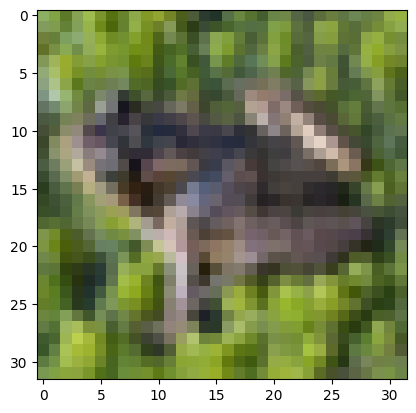

In [62]:
i = 29009
plt.imshow(X_train[i])
print(y_train[i])

# STEP #3: DATA PREPARATION

In [63]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [64]:
number_cat = 10

In [65]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [66]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [67]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [68]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [69]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [70]:
X_train = X_train/255
X_test = X_test/255


In [71]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [72]:
X_train.shape

(50000, 32, 32, 3)

In [73]:
Input_shape = X_train.shape[1:]

In [74]:
Input_shape

(32, 32, 3)

# STEP #4: TRAIN THE MODEL

In [75]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [76]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [77]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [78]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 10, shuffle = True)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 164s 103ms/step - accuracy: 0.3366 - loss: 1.7704
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 184s 117ms/step - accuracy: 0.5637 - loss: 1.2136
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 186s 119ms/step - accuracy: 0.6371 - loss: 1.0186
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 171s 109ms/step - accuracy: 0.6877 - loss: 0.8821
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 94ms/step - accuracy: 0.7178 - loss: 0.8028
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 151s 96ms/step - accuracy: 0.7390 - loss: 0.7385
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 95ms/step - accuracy: 0.7585 - loss: 0.6832
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 95ms/step - accuracy: 0.7691 - loss: 0.6485
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 93ms/step - accuracy: 0.7812 - loss: 0.6064
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 152s 97ms/step - accuracy: 0.7972 - loss: 0.5697


# STEP #5: EVALUATE THE MODEL

In [79]:
evaluation = cnn_model.evaluate(X_test, y_test)
accuracy_percentage = evaluation[1] * 100
print('Test Accuracy: {:.2f}%'.format(accuracy_percentage))


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.7745 - loss: 0.6873
Test Accuracy: 77.18%


In [80]:
predicted_probabilities = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


array([3, 8, 0, ..., 5, 4, 7], dtype=int64)

In [81]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [82]:
y_test = y_test.argmax(1)

In [83]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

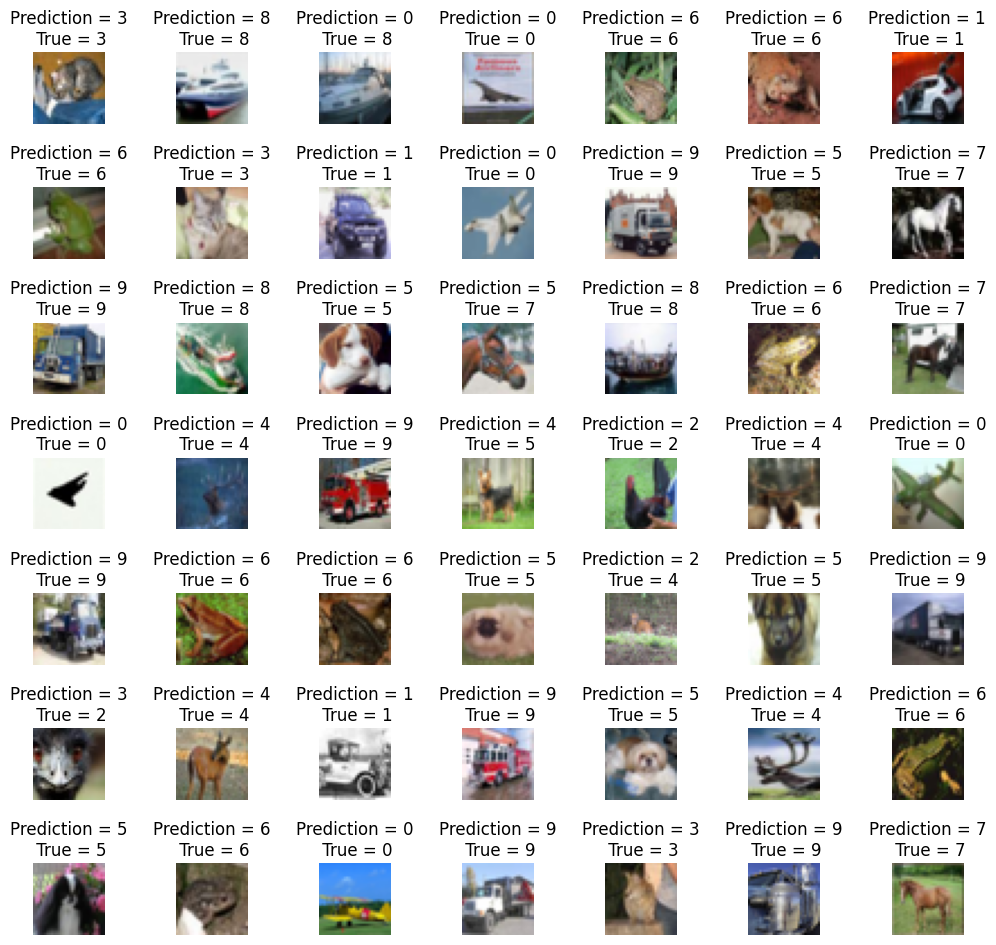

In [84]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

# STEP #6: EVALUATING THE MODEL ON OUR OWN DATASET COLLECTED BY US

In [112]:
def load_own_dataset(directory):
    images = []
    labels = []
    class_mapping = {'Birds': 2, 'Cat': 3, 'Horse': 7, 'Dog': 5}

    for class_name, label in class_mapping.items():
        class_dir = os.path.join(directory, class_name)
        for image_name in os.listdir(class_dir):
            try:
                image_path = os.path.join(class_dir, image_name)
                image = cv2.imread(image_path)
                if image is None:
                    print(f"Error: Unable to read image '{image_path}'")
                    continue
                image = cv2.resize(image, (32, 32))
                if image is None:
                    print(f"Error: Unable to resize image '{image_path}'")
                    continue
                image = image.astype('float32') / 255
                images.append(image)
                labels.append(label)
            except Exception as e:
                print(f"Error: An error occurred while processing image '{image_path}': {e}")

    return np.array(images), np.array(labels)


import os
import cv2
X_own_test, y_own_test = load_own_dataset('Own_Dataset')


5


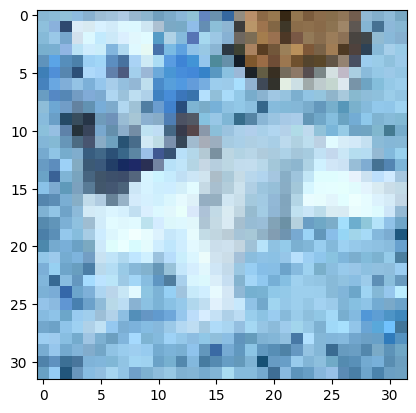

In [113]:
i = 27
plt.imshow(X_own_test[i])
print(y_own_test[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7742 - loss: 0.8490
Own Dataset Test Accuracy: 77.42%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


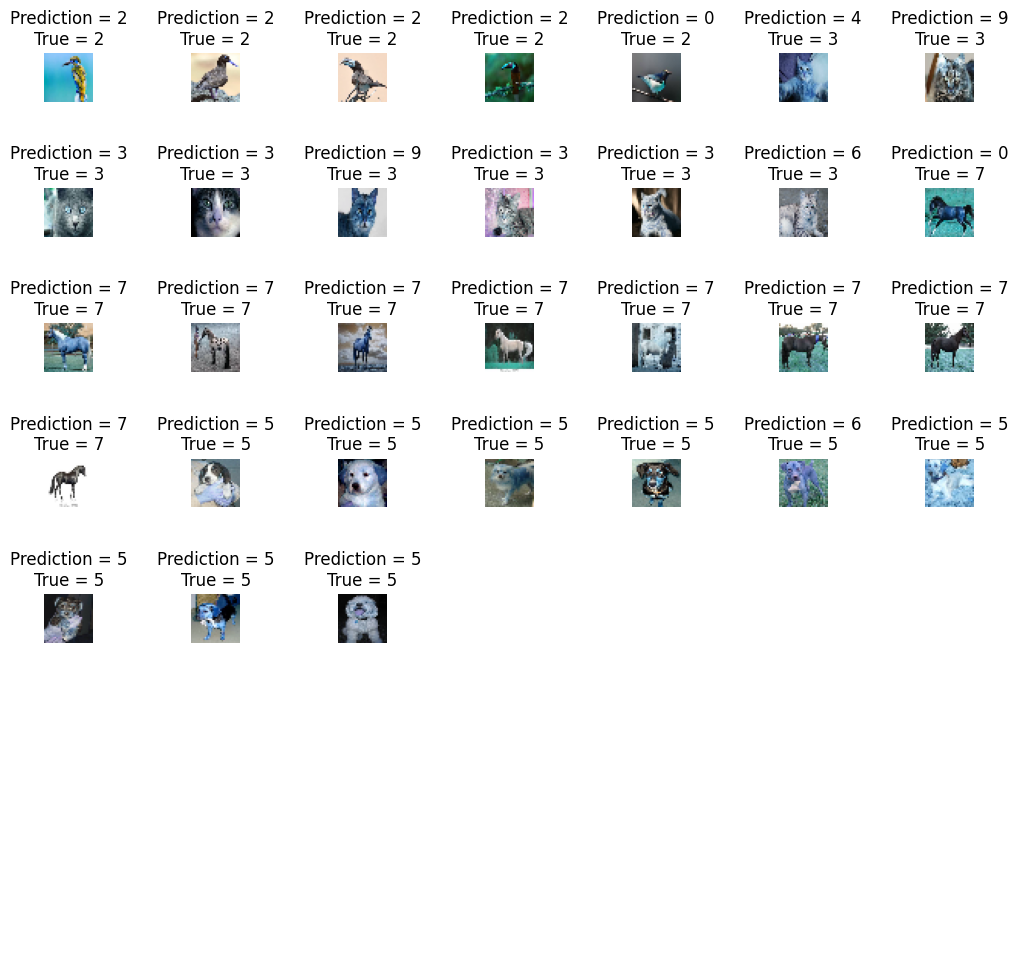

In [114]:
own_evaluation = cnn_model.evaluate(X_own_test, keras.utils.to_categorical(y_own_test, 10))
accuracy_percentage = own_evaluation[1] * 100
print('Own Dataset Test Accuracy: {:.2f}%'.format(accuracy_percentage))


# Visualize predictions on your own dataset
predicted_probabilities_own = cnn_model.predict(X_own_test)
predicted_classes_own = np.argmax(predicted_probabilities_own, axis=1)

L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()
num_samples = min(len(X_own_test), L * W)  # Get the minimum of total samples and total subplots

for i in range(num_samples):
    axes[i].imshow(X_own_test[i])
    axes[i].set_title('Prediction = {}\nTrue = {}'.format(predicted_classes_own[i], y_own_test[i]))
    axes[i].axis('off')

# Hide remaining subplots
for i in range(num_samples, L * W):
    axes[i].axis('off')

plt.subplots_adjust(wspace=2)
plt.show()

